In [1]:
import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np
from rasterio.plot import show

from config import climo_dir, metrics

In [2]:
climo_fps = list(climo_dir.glob("*.tif"))
assert len(climo_fps) == 9 * 2 * 4

In [5]:
def plot_maps(var):
    fig, axs = plt.subplots(2, 2, figsize=(14, 9), sharex=True, sharey=True)
    var_fps = [x for x in climo_fps if var in x.name]
    
    arrs = []
    titles = []
    for ax in axs.flatten():
        i = np.random.randint(len(var_fps))
        fp = var_fps[i]
        with rio.open(fp) as src:
            show(src, ax=ax, interpolation="none")
            arrs.append(src.read(1))
        title = fp.name[0:-4]
        ax.set_title(title)
        titles.append(title)

    plt.show()
    
    return arrs, titles


def plot_histograms(arrs, titles):
    fig, axs = plt.subplots(2, 2, figsize=(12, 12))
    for ax, arr, title in zip(axs.flatten(), arrs, titles):
        arr = arr.flatten()
        arr = arr[arr != -9999]
        ax.hist(arr)
        ax.set_title(title)

    plt.show()

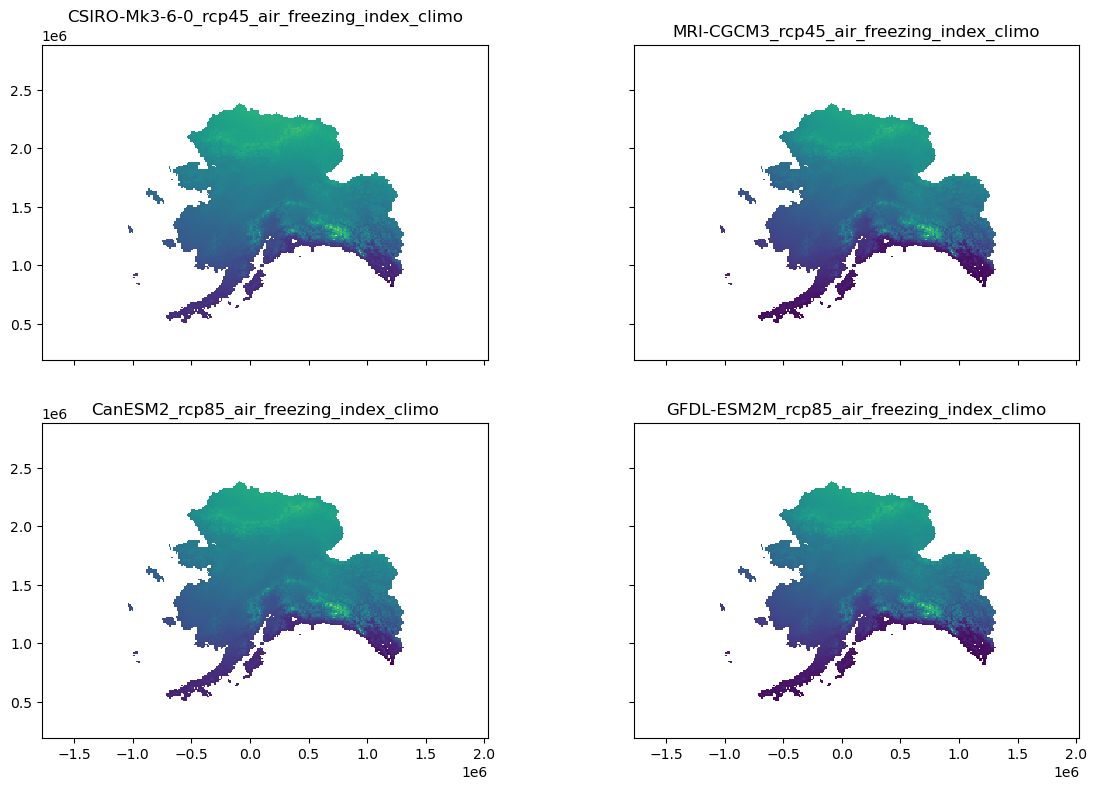

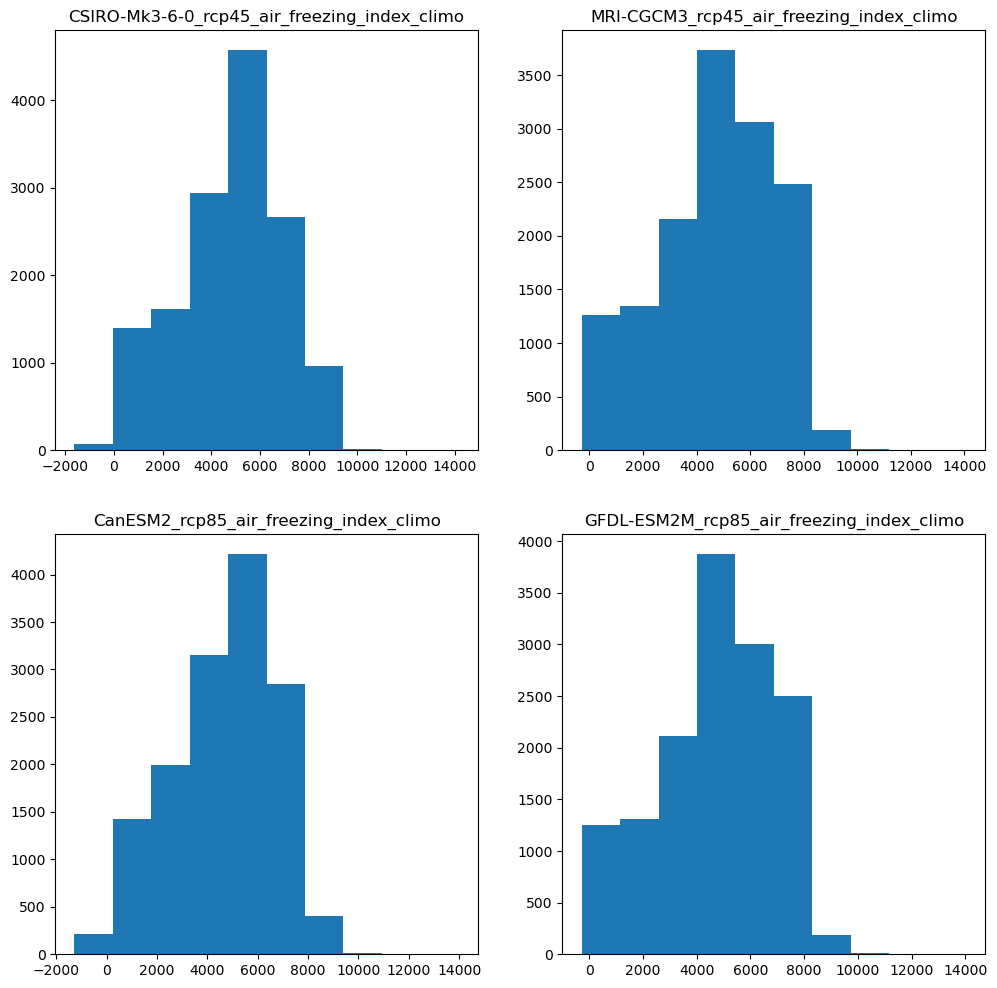

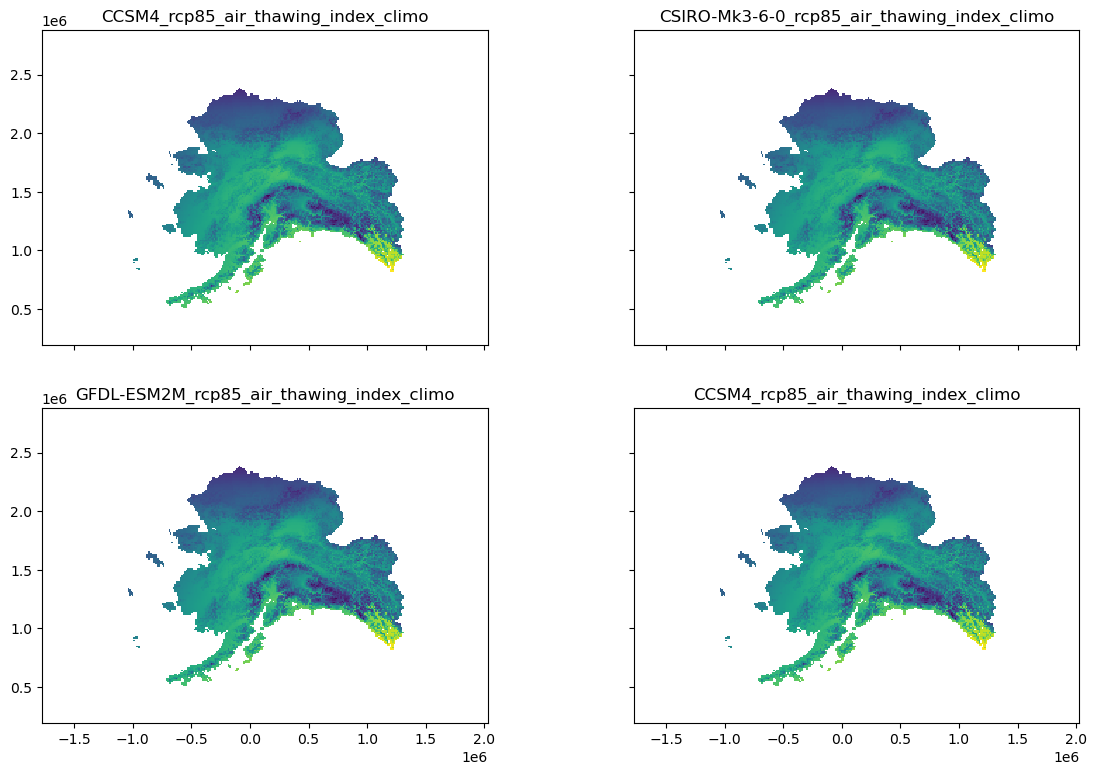

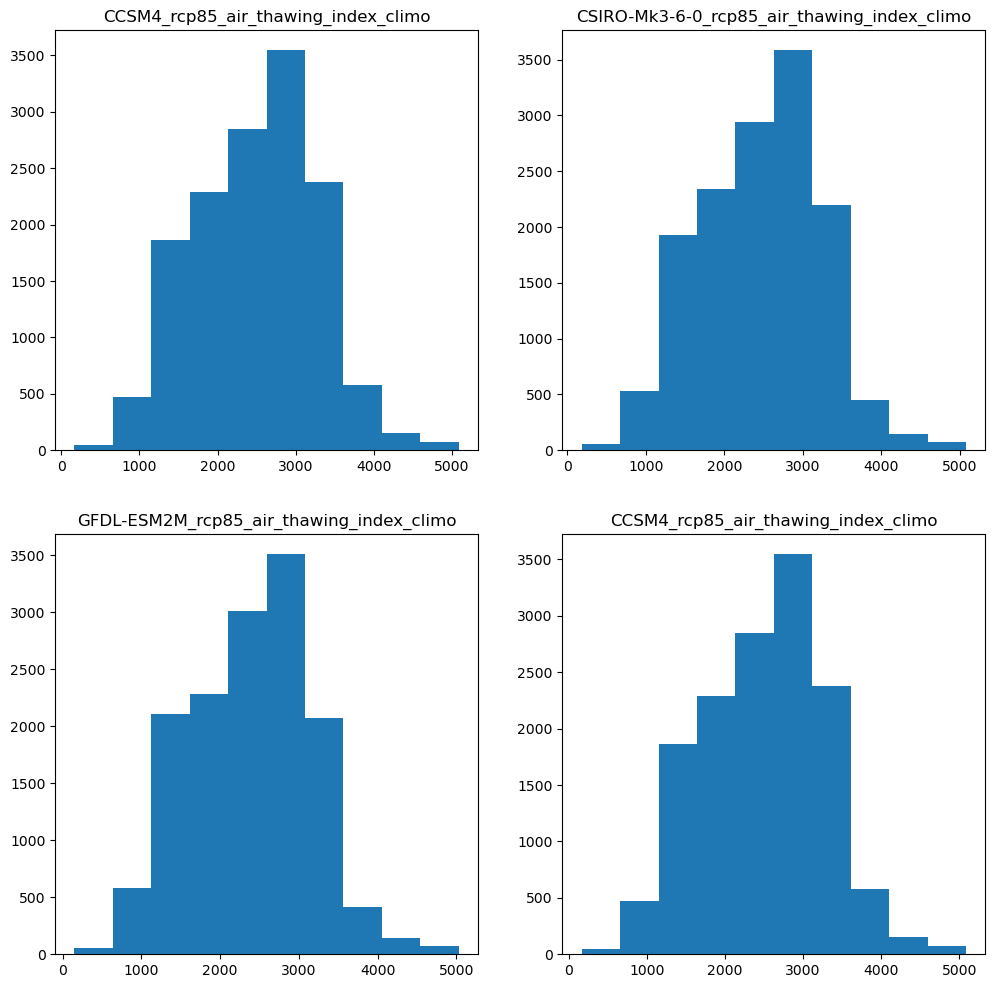

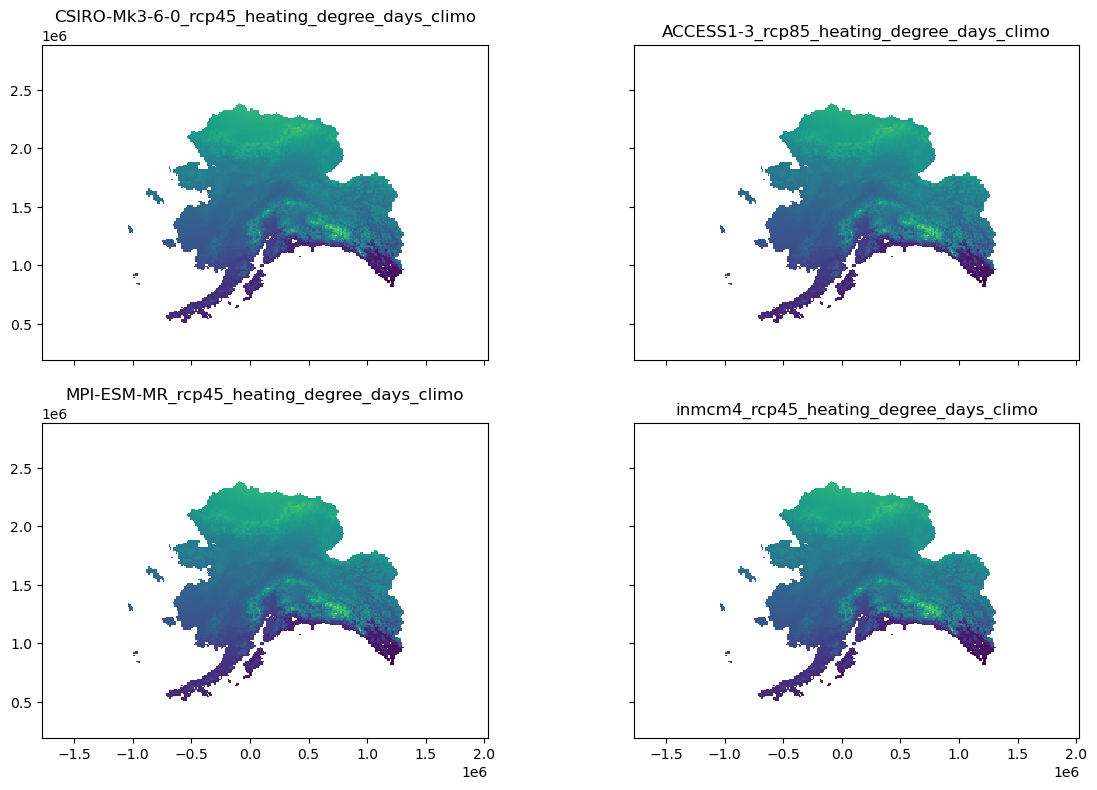

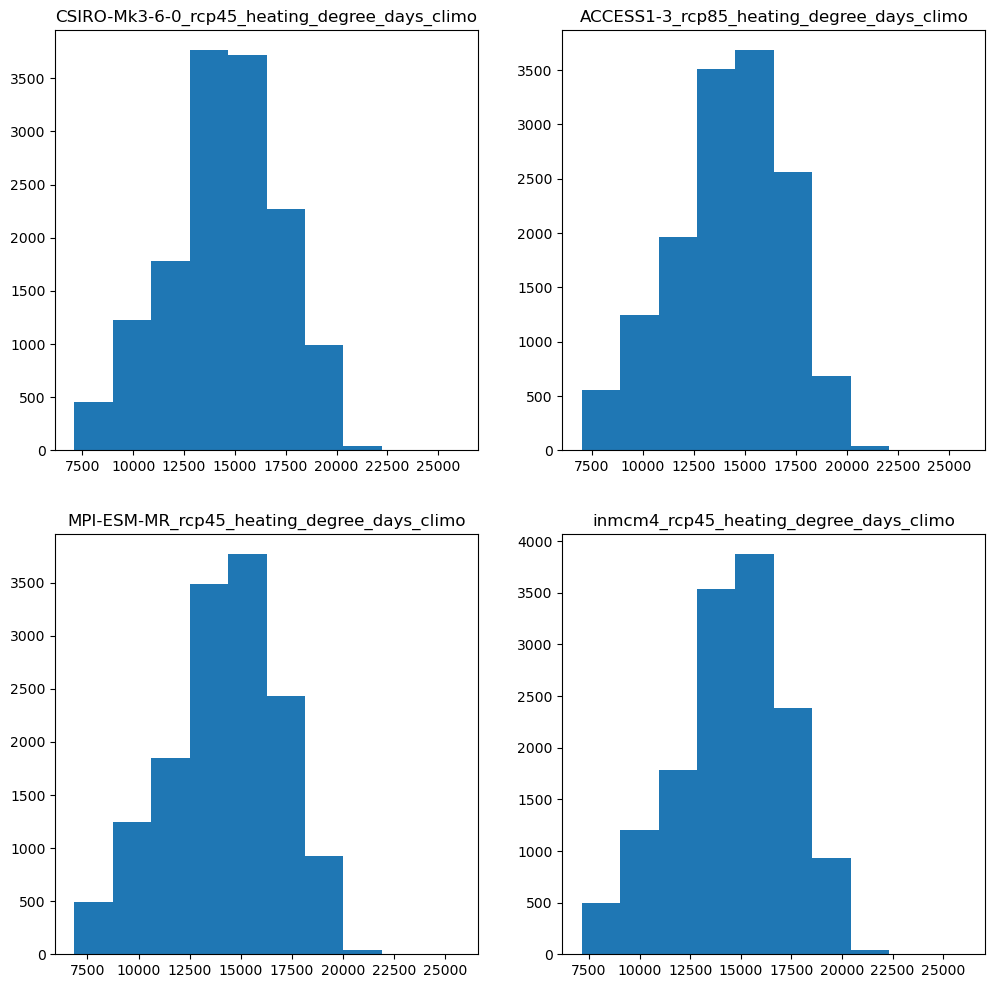

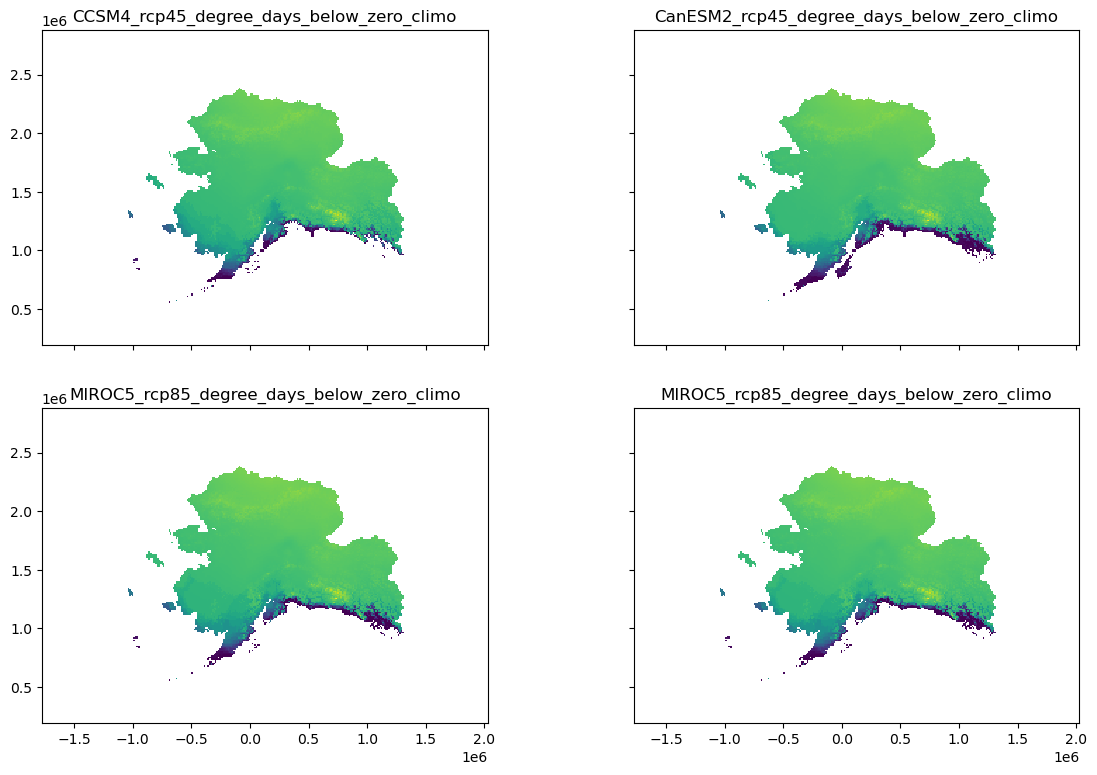

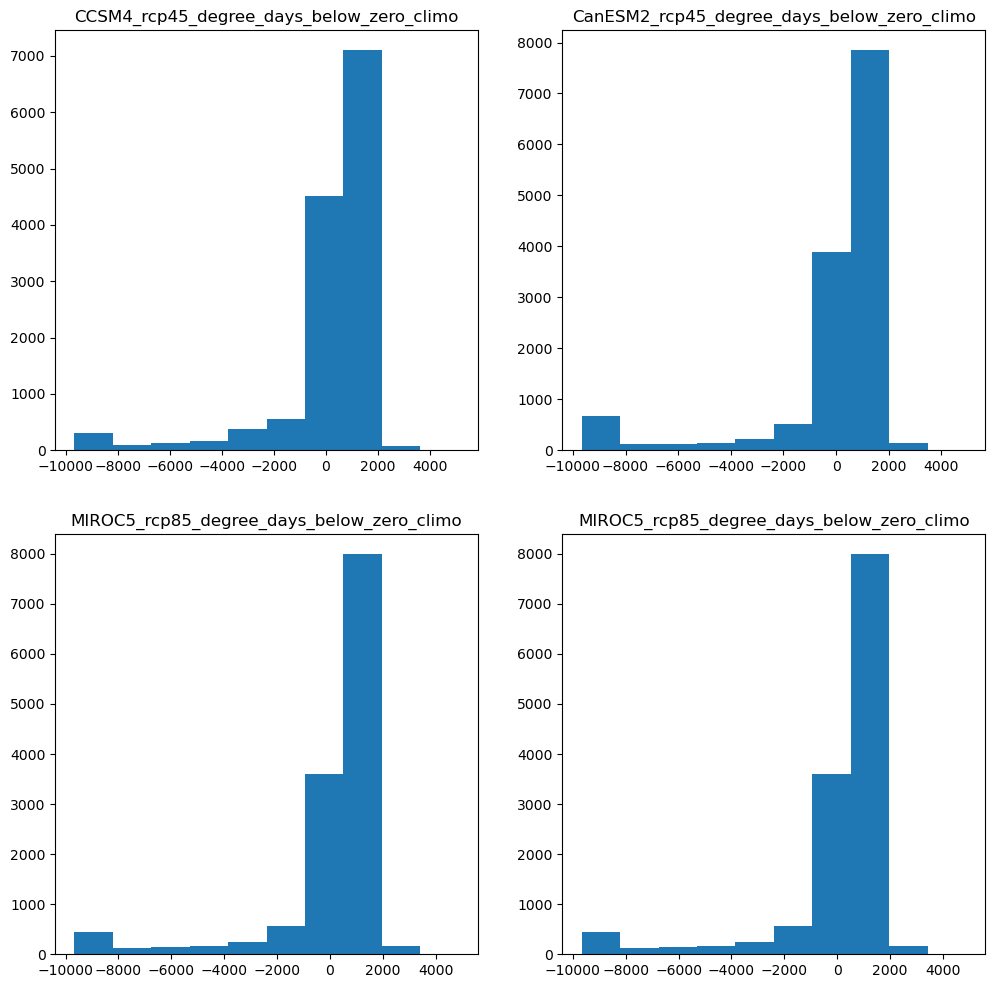

In [6]:
for var in metrics:
    arrs, titles = plot_maps(var)
    plot_histograms(arrs, titles)